In [466]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [467]:
# pandas 구조로 변환
perch_length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]

df = pd.DataFrame([perch_length,perch_weight])
df = df.T


In [468]:
# numpy의 구조로 변환
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

Text(0, 0.5, '무게')

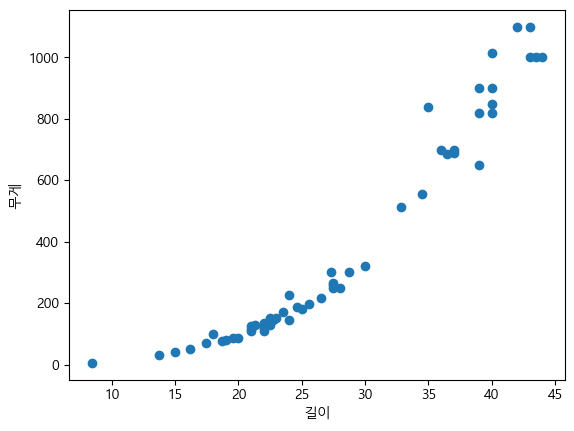

In [469]:
# 산점도로 출력하시오.
# x축은 길이, y축은 무게
plt.scatter(perch_length,perch_weight)
plt.xlabel('길이')
plt.ylabel('무게')

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       56 non-null     float64
 1   1       56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


### 머신러닝 구현
1. 데이터 전처리 - Nan,0,단위처리,훈련세트,테스트세트 분리
2. 데이터 학습시키기
3. 데이터 예측하기 - 평균 절대값 오차 
4. 예측값 구하기 

In [471]:
# 머신러닝 구현
# 1. 데이터 전처리 - Nan,0,단위처리,훈련세트,테스트세트 분리
train_input,test_input,train_target,test_target = train_test_split(
    perch_length,perch_weight
)
train_input
# 2. 데이터 학습시키기
# 3. 데이터 예측하기
# 4. 예측값 구하기

array([18.7, 22. , 20. , 21. , 17.4, 13.7, 36. , 39. , 40. , 32.8, 24. ,
       40. , 26.5, 40. , 22. , 43. , 39. , 21.3, 24.6, 34.5, 36.5, 15. ,
       27.5, 30. , 27.5,  8.4, 25. , 21. , 37. , 35. , 25.6, 43. , 24. ,
       22.5, 28.7, 40. , 27.5, 16.2, 18. , 22. , 19. , 43.5])

In [472]:
arr1 = np.array([1,2,3,4,5,6])
# arr1 = arr1.reshape(6,1)
arr1 = arr1.reshape(-1,1) # 행렬의 모양을 변경
arr1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [473]:
# 알고리즘 구현을 위한 2차원 행렬로 변경.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [474]:
train_input.shape

(42, 1)

In [475]:
# 총 개수 : 56개
train_input.shape # 42개
test_input.shape # 14개

(14, 1)

In [476]:
# 데이터 학습시키기
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [477]:
# 예측률 측정하기
score = knr.score(test_input,test_target)
print("예측률 : ",score)

예측률 :  0.9505443360961403


knn 회귀 분석을 통해 농어에 대한 무게를 예측하는 프로그램을 구현

In [478]:
# 데이터 예측하기 - test_input 데이터 검증
# 예측의 오차 범위 - 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
# 무게 예측
print("예측값 : ",predict)



예측값 :  [144.  113.  125.  993.  759.  258.6  96.6 159.6 897.  125.  125.  146.
 993.  258.6]


In [ ]:
# 예측한 값과 실제값의 평균 절대값 오차
test_mean = mean_absolute_error(test_target,predict)
print("오차범위 : ",test_mean)

In [489]:
# 실제 train데이터의 예측률은 어느정도 나오는지 확인
score = knr.score(test_input,test_target)
print("예측률 : ",score)
score2 = knr.score(train_input,train_target)
print("train예측률 : ",score2)

예측률 :  0.9670713597986407
train예측률 :  0.9807680925567782


그래프 구성 

In [495]:
# 이웃의 개수를 축소 : 5에서 3으로 변경
# 과소적합은 n_neighbors를 줄임.
# 과대적합은 n_neighbors를 늘림.
knr.n_neighbors = 3
# 데이터 훈련 다시 시키기
knr.fit(train_input,train_target)
# train데이터 예측하기
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9807680925567782
0.9670713597986407


In [498]:
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [499]:
# np.arange(5,45).reshape(-1,1)
arr = [[i] for i in range(5,45+1)] # x축의 좌표
arr

[[5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45]]

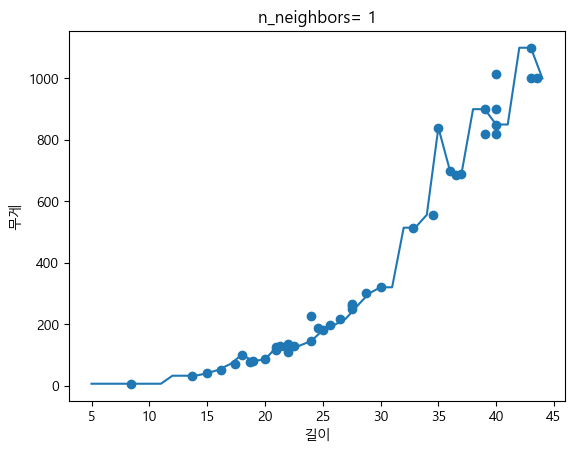

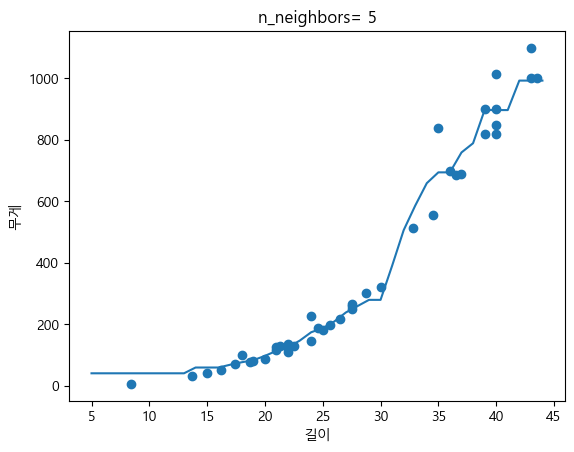

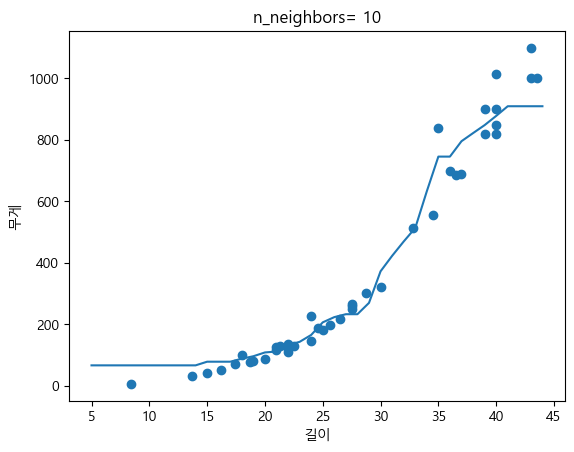

In [510]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1) # 5,6,7.... 45
for n in [1,5,10]: # n_neighbors = 1,5,10 예측률을 그래프로 표시
    knr.n_neighbors = n
    # 데이터 훈련 다시 시키기
    knr.fit(train_input,train_target)
    
    # 배열로 만든 길이를 가지고 예측무게 산출
    predict = knr.predict(x)
    
    # 훈련세트의 값을 먼저 출력
    plt.scatter(train_input,train_target)
    plt.plot(x,predict)
    plt.title('n_neighbors= {}'.format(n))
    plt.xlabel('길이')
    plt.ylabel('무게')
    plt.show()
    
    